In [1]:
import os
import pyreadr
import pandas as pd
from figures_static_helpers import plot_proj, plot_death_choices, plot_e0_birth, plot_pyramid, plot_tfr, plot_tfr_converge, plot_choropleth
from data_loaders import load_all_data

colors = ['#4575b4', '#E6AC00', '#d73027']
unabr_path = '../results_unabridged/'
all_projections = pd.read_csv(unabr_path + 'all_projections.csv')
data_dir = "../data"
rds_path  = os.path.join(data_dir, "conteos.rds")
data = load_all_data(data_dir)
conteos = data["conteos"]
all_lt = pd.read_csv(os.path.join(unabr_path, 'all_lifetables.csv'))

In [2]:
all_projections.head(5)

,DPTO_NOMBRE,death_choice,scenario,default_tfr_target,improvement_total,ma_window,year,Sex,EDAD,population
0,AMAZONAS,EEVV,high,1.45,0.25,5,2019,F,0,1280.088280
1,AMAZONAS,EEVV,high,1.45,0.25,5,2019,F,1,813.494538
2,AMAZONAS,EEVV,high,1.45,0.25,5,2019,F,2,815.738134
3,AMAZONAS,EEVV,high,1.45,0.25,5,2019,F,3,819.878354
4,AMAZONAS,EEVV,high,1.45,0.25,5,2019,F,4,819.118019


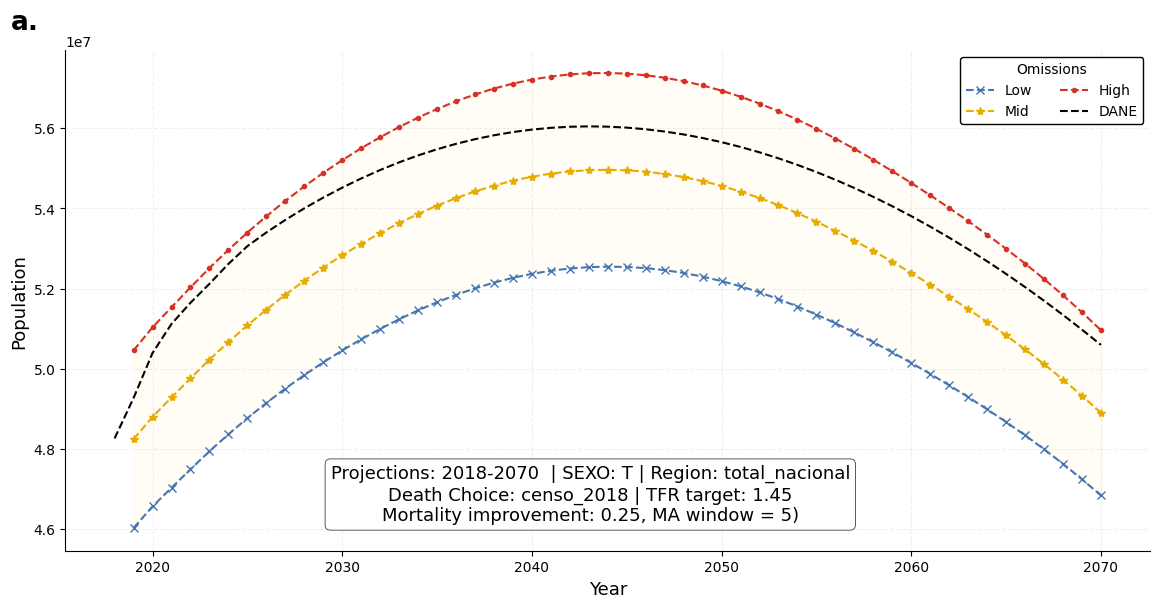

In [3]:
Sex = 'T'
death_choice = 'censo_2018'
DPTO_NOMBRE = "total_nacional"
default_tfr_target = 1.45
improvement_total = 0.25
ma_window = 5
target_year = 2070
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'national_defaults_total_censo.pdf')

plot_proj(all_projections, Sex, death_choice, DPTO_NOMBRE, default_tfr_target,
          improvement_total, ma_window, target_year, 'a.', fig_path, colors)

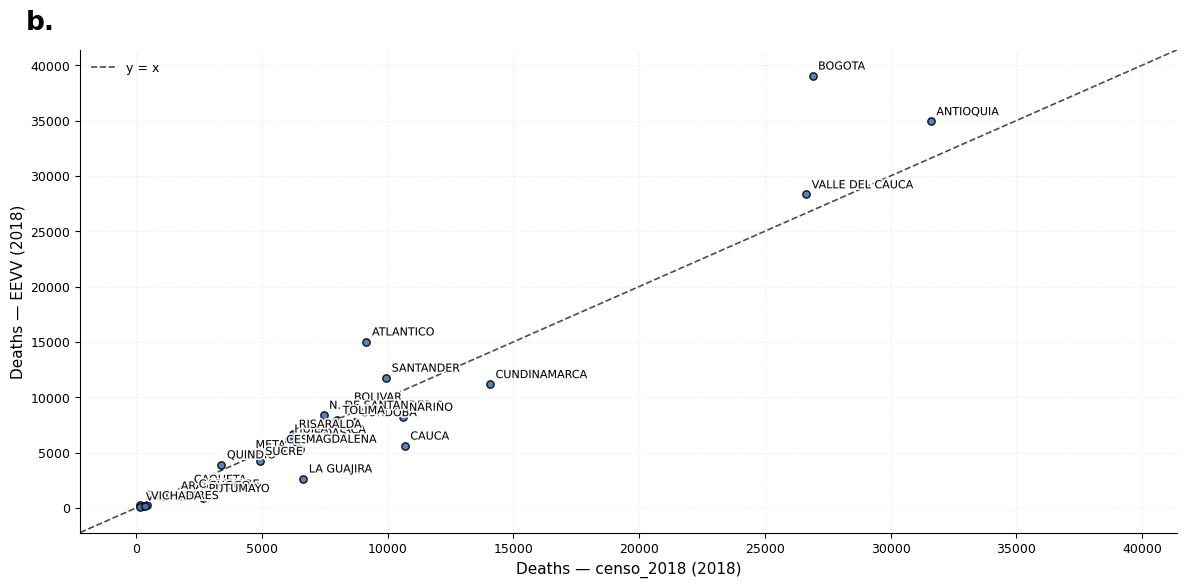

In [4]:
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'death_choice.pdf')    
plot_death_choices(conteos, 'b.', fig_path)

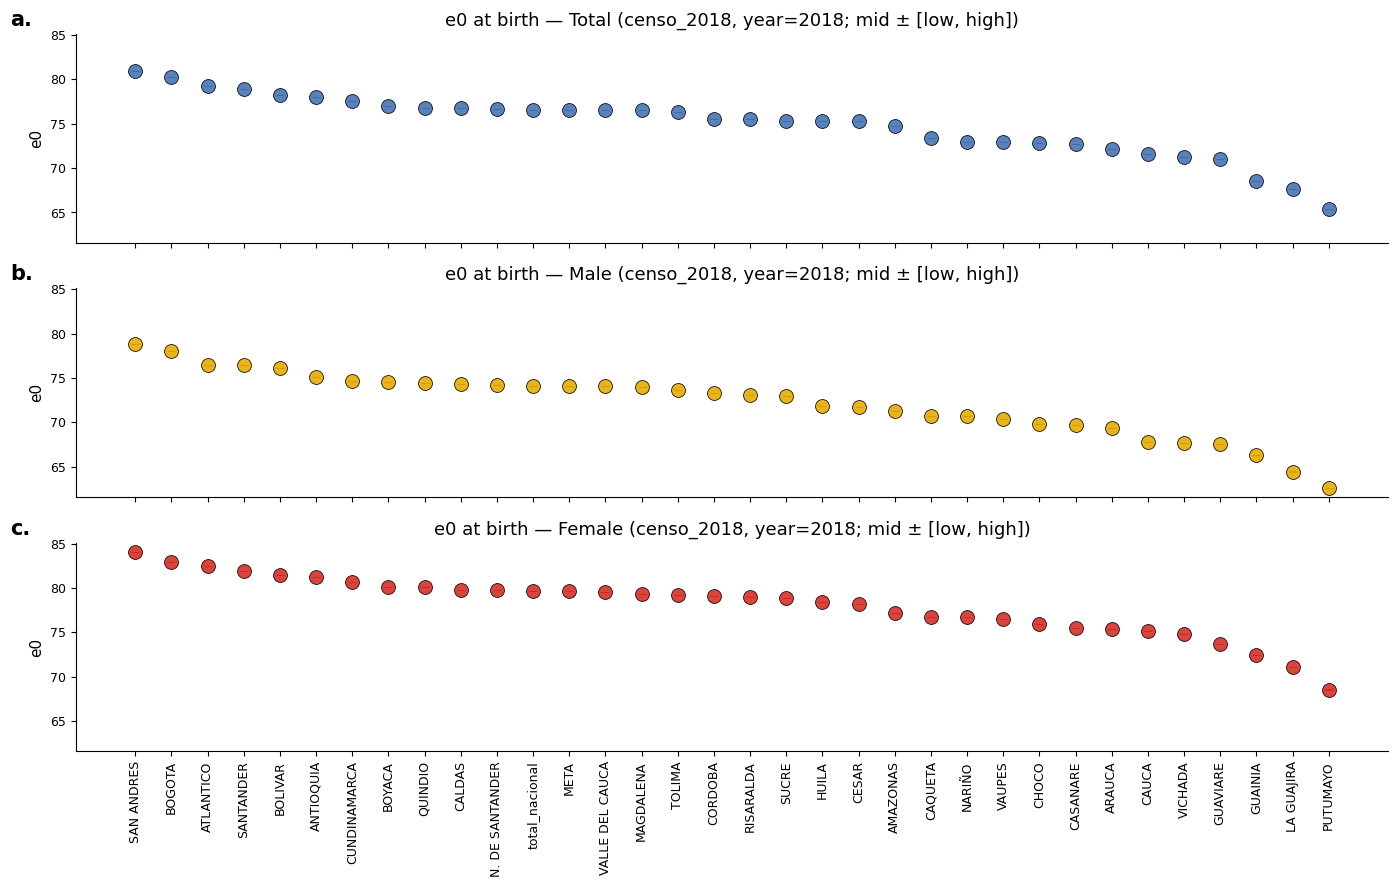

In [5]:
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'e0_censo_2018_vertical.pdf')
plot_e0_birth(all_lt, colors, fig_path, 'censo_2018', 2018, 2070)

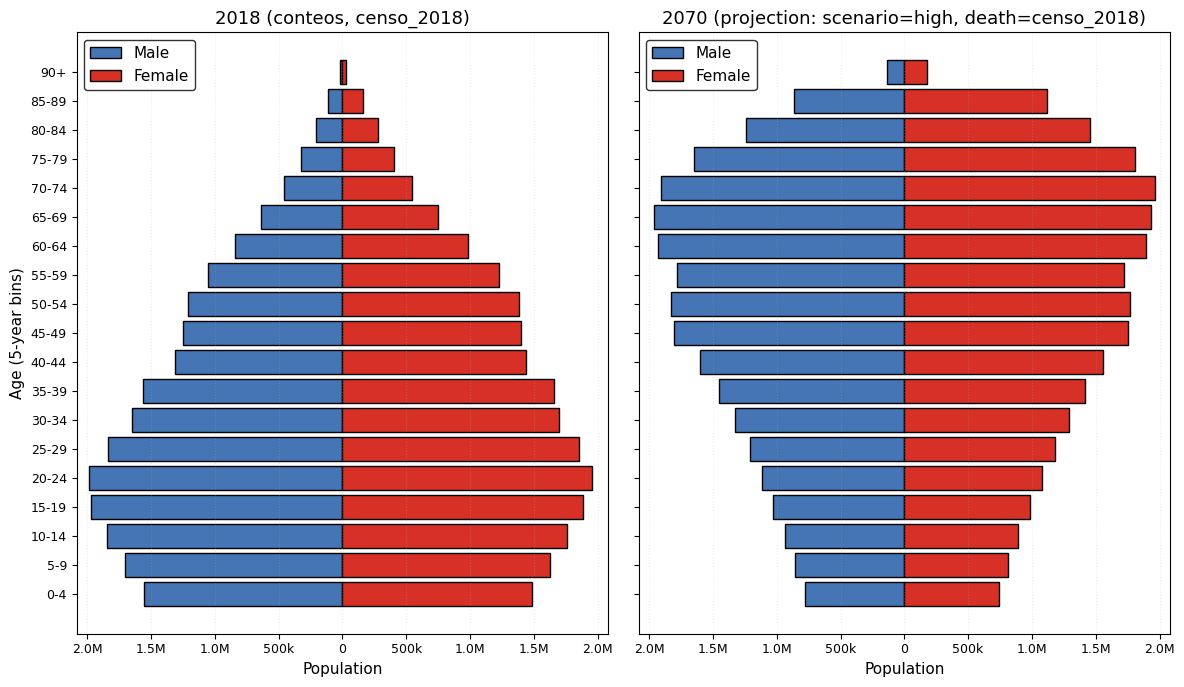

In [6]:
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'censo_2018_2070_pyramid.pdf')

plot_pyramid(conteos, colors, fig_path, all_projections, proj_scenario='high',
             proj_death_choice='censo_2018',
             proj_year = 2070, conteos_source="censo_2018",
             AGE_ORIENTATION = "youngest_bottom")

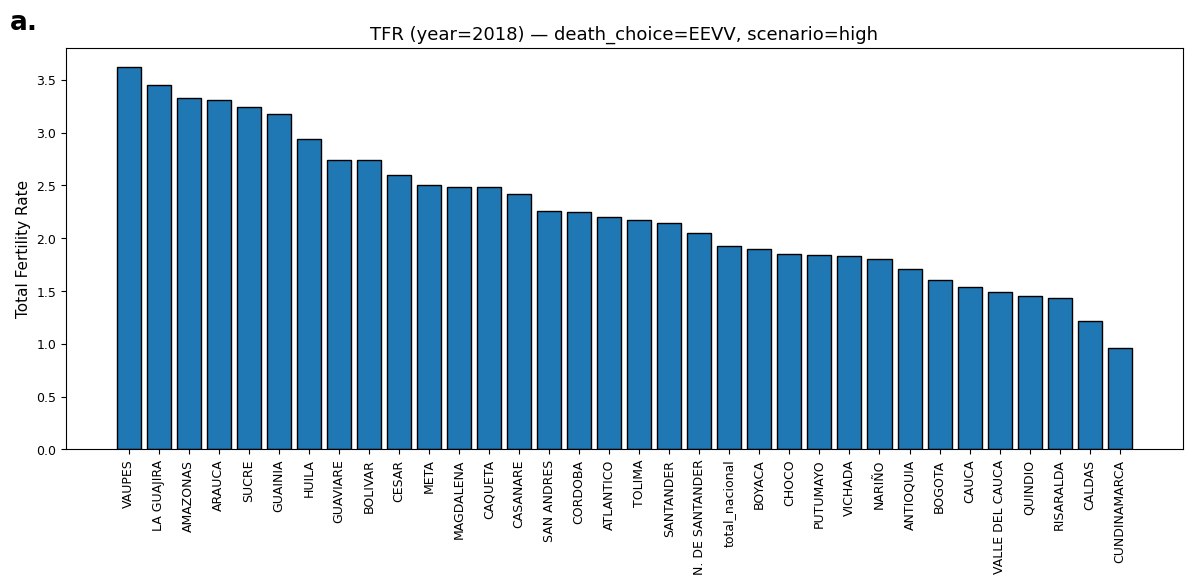

In [7]:
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'total_tfr.pdf')
plot_tfr(pd.read_csv(os.path.join(unabr_path, "all_asfr.csv")), 
         colors, 2018, fig_path)

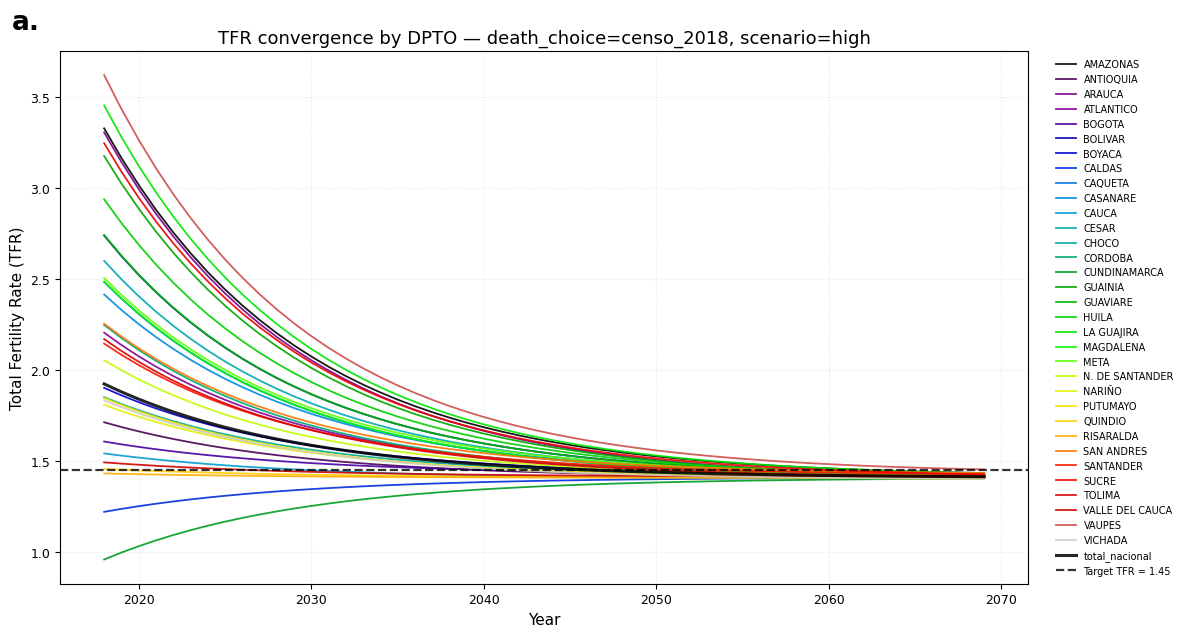

In [8]:
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'total_tfr.pdf')
plot_tfr_converge(pd.read_csv(os.path.join(unabr_path, "all_asfr.csv")),
                  'high', 'censo_2018', fig_path)

[shp] Using: ../data/Cartografía_extracted/Cartografía/Colombia by Departaments/Departamentos_Correcto_SanAndres_Providencia_Uno.shp
      name column: DEPTO  (features: 69)
[years] Using base=2019, target=2070 (available 2019..2070)


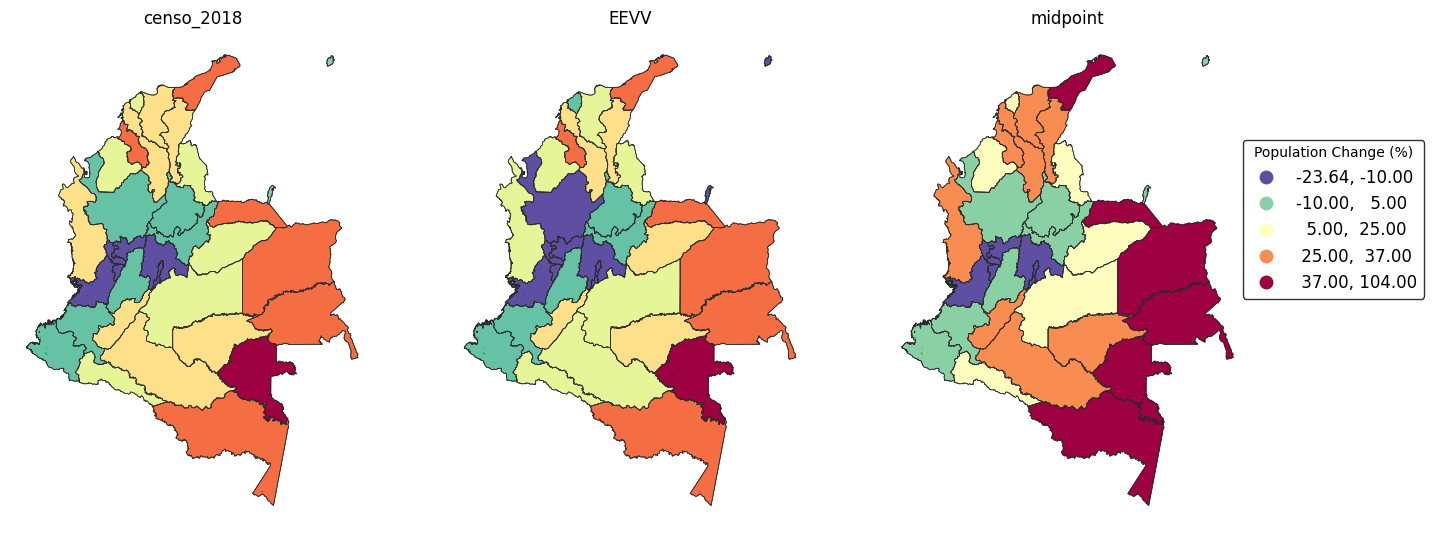

In [9]:
root_shp_dir = "../data/Cartografía_extracted"     
scenario           = "high"
base_year_req      = 2019
target_year_req    = 2070
death_choices_trip = ["censo_2018", "EEVV", "midpoint"]
fig_path = os.path.join(os.getcwd(), '..', 'figures', 'total_tfr.pdf')

plot_choropleth(root_shp_dir, fig_path, all_projections,
                scenario, base_year_req, target_year_req,
                death_choices_trip)